In [1]:
import numpy
import numpy as np
import pandas
import pandas as pd
from numba import njit
import sys,glob
import zipfile, os, time
import urllib3
from datetime import datetime, timedelta
import glob
import h5py
import netCDF4 as nc
sys.path.append(os.getcwd()+'/../cds-backend/code/')
sys.path.append(os.getcwd()+'/../harvest/code/')
import rasotools
# from harvest_convert_to_netCDF_newfixes import write_dict_h5
import cds_eua4 as eua
# eua.logging_set_level(30)
import xarray as xr

import cdsapi, zipfile, os, time
#import schedule
import copy
from shutil import copyfile
import multiprocessing
import pickle

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import warnings
warnings.filterwarnings('ignore')

from inspect import getmembers, isfunction


from IPython.display import Image
from IPython.core.display import HTML 
import rasotools


# import ray
# ray.init(num_cpus=25)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

no config found


In [2]:
# trends = pickle.load( open( glob.glob('/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_trends/*.p')[-1], "rb" ) )
# trends
# for i in trends.keys():
#     lats = []
#     lons = []
#     vals = []
#     minl = []
#     maxl =[]

#     for i in trends:
#         if trends[i] >= 15:
#             maxl.append([i, trends[i]])
#         elif trends[i] <= -15:
#             minl.append([i, trends[i]])
#         else:
#             lats.append(float( i.split('_')[0]))#trends[i].lat))
#             lons.append(float( i.split('_')[1]))#trends[i].lon))
#             vals.append(float(trends[i].values))

# trends

In [3]:
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import numpy

def rgb(r,g,b):
    return tuple(numpy.asarray([r,g,b],dtype=float))

def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    se = [(None,) * 3, 0.0]
    for s in seq:
        se.append(s[0])
        se.append(s[1])#+ list(seq) +
        seq=se+[ (None,) * 3]
        cdict = {'red': [], 'green': [], 'blue': []}
        for i, item in enumerate(seq):
            if isinstance(item, float):
                r1, g1, b1 = seq[i - 1]
                r2, g2, b2 = seq[i + 1]
                cdict['red'].append([item, r1, r2])
                cdict['green'].append([item, g1, g2])
                cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)



# x,y=numpy.meshgrid(numpy.linspace(-3,3,101),numpy.linspace(-3,3,101))
# gauss=x/6+y/6
# clist=numpy.linspace(-1,1,26)
# plt.contourf(x,y,gauss,clist,cmap=cmnew)
# plt.colorbar()
# plt.show()
# print('ready')

def plt_trends(lla,pdict,var='_',bias='_', marker_size = 510, marker_shape = 's', alpha=0.8, cold_positive=False):


    rgblist=[ # "rgb(0,0,0.3)", 
            "rgb(0,0,0.5)",
            "rgb(0,0,0.7)", "rgb(0,0,0.9)", "rgb(0,0.15,1)",
            "rgb(0,0.3,1)", "rgb(0,0.45,1)", "rgb(0,0.6,1)",
            "rgb(0,0.75,1)", "rgb(0,0.85,1)", "rgb(0.2,0.95,1)",
            "rgb(0.45,1,1)", "rgb(0.75,1,1)", "rgb(1,1,0)",
            "rgb(1,0.9,0)", "rgb(1,0.8,0)", "rgb(1,0.7,0)",
            "rgb(1,0.6,0)", "rgb(1,0.5,0)", "rgb(1,0.4,0)",
            "rgb(1,0.3,0)", "rgb(1,0.15,0)", "rgb(0.9,0,0)",
            "rgb(0.7,0,0)", "rgb(0.5,0,0)", "rgb(0.3,0,0)"
            ]

    if cold_positive:
        rgblist = np.flip(rgblist)
    rgblist2=zip([eval(rgblist[l]) for l in range(len(rgblist))],numpy.linspace(0,1,len(rgblist)))

    cmnew=make_colormap(rgblist2)

    params = {'legend.fontsize': 'x-large',
              'figure.figsize': (12, 8),
             'axes.labelsize': 'x-large',
             'axes.titlesize': 20,
             'xtick.labelsize':'medium',
             'ytick.labelsize':'medium'}
    pylab.rcParams.update(params)

    if 'scale' not in pdict.keys():
        pdict['scale']=2.0
    a = rasotools.plot._helpers.cost(lla[2],lla[1],lla[0])
    cost = np.sum(a)/len(a)

    ax = plt.axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
    ax._autoscaleXon = False
    ax._autoscaleYon = False

    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.coastlines()

    plt.scatter(lla[2], lla[1], s=marker_size, alpha=alpha,
                c= lla[0],
                cmap=cmnew,
                vmin=-pdict['scale'],
                vmax=pdict['scale'],
                marker = marker_shape,
                edgecolor='k',)
    plt.colorbar(orientation='horizontal', label='Trend '+pdict['units'], shrink=0.9, pad=0.05)
    plt.tight_layout()
    plt.title('Brightness Temperature ' + str(pdict['start'])+'-'+str(pdict['stop'])+', '+str(pdict['pl'])+'\n'+'trend heterogeneity cost function: '+'{:.2f}'.format(cost)+'\n'+'number of stations: '+str(len(lla[0])))
        
    try:
        os.mkdir('plots_new')
    except:
        pass
#     plt.savefig('plots_new/cuon_'+names[bias]+'_'+str(pdict['start'])+'-'+str(pdict['stop'])+'_'+str(pdict['pl']), bbox_inches='tight')
    plt.show()
    plt.close()



pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [12, 8]

def plot_world_map(file, mission_channel, marker_size = 510, marker_shape = 's', alpha = 0.8, cold_positive=False):
    trends = pickle.load( open( file, "rb" ) )
    lats = []
    lons = []
    vals = []
    minl = []
    maxl =[]

    for i in trends:
        if trends[i] >= 15:
            maxl.append([i, trends[i]])
        elif trends[i] <= -15:
            minl.append([i, trends[i]])
        else:
            lats.append(float( i.split('_')[0]))#trends[i].lat))
            lons.append(float( i.split('_')[1]))#trends[i].lon))
            vals.append(float(trends[i].values))
    # print(' --- dropped ---')
    # print(maxl)
    # print(minl)
    # /10. for K/10a
    plt_trends(np.array([np.array(vals)/10., np.array(lats), np.array(lons)]), dict(var='temperature',pl=mission_channel,start='1999',stop='2009',units=r'K/10a'), marker_size = marker_size, marker_shape = marker_shape, alpha=alpha, cold_positive=cold_positive)
#     rasotools.plot.map.points(lon=np.array(lons), lat=np.array(lats), values=np.array(vals), vmin=-5, vmax=5)
    plt.show()
    plt.close()

In [12]:
# ### Convert fiduc. data to gridded mean without interpolation
# for yr in range(2012,2018):
#     lats = np.array(range(-8875,+9125, 250))/100.
#     print(len(lats), lats)
#     lons = np.array(range(125, 36000, 250))/100.
#     print(len(lons), lons)

#     time_series = {}
#     for targetlon in lats:
#         for targetlat in lons:
#             time_series[str(targetlat) + '_' + str(targetlon)] = [[],[],[],[],[]]

#     for imon in range(1,13):
#         print("Month: ", imon)
#         fidu_files = glob.glob('/users/staff/uvoggenberger/scratch/fiduceo/dap.ceda.ac.uk/neodc/fiduceo/data/fcdr/microwave/v4.1/mhs/noaa19/'+str(yr)+'/'+str(imon).zfill(2)+'/*/*.0.1.nc')

#         to_concat = []
#         for fifi in fidu_files[:]:
#             # print(fifi)
#             with h5py.File(fifi) as fi:
#                 # print(fi.keys())
#                 vars = ['Ch3_BT', 'Ch4_BT', 'Ch5_BT', 'latitude', 'longitude', 'Time']
#                 to_df = {}
#                 for var in vars:
#                     if var == 'Time':
#                         to_df[var] = np.array([fi[var][:]]*90).flatten()
#                     else:
#                         to_df[var] = np.array(fi[var][:]).flatten()/100.
#                     # print(var, len(to_df[var]))
#             df = pd.DataFrame.from_dict(to_df)
#     #         break
#     #     break
#     # break
#             for chan in ['Ch3_BT', 'Ch4_BT', 'Ch5_BT']:
#                 df[chan].replace(655.35, np.nan, inplace=True)
#             df.dropna(inplace=True)
#             df.Time = pd.to_datetime(df.Time, unit='s')
#             to_concat.append(df)

#         df_mon = pd.concat(to_concat)

#         for targetlon in lats:
#             for targetlat in lons:
#                 lat_range = [targetlat - 1.25, targetlat + 1.25]
#                 lon_range = [targetlon - 1.25, targetlon + 1.25]
#                 target_df = df_mon[np.logical_and(np.logical_and(df_mon.latitude >= lat_range[0], df_mon.latitude < lat_range[1]),np.logical_and(df_mon.longitude >= lon_range[0], df_mon.longitude < lon_range[1]))]
#                 time_series[str(targetlat) + '_' + str(targetlon)][0].append(np.nanmean(target_df['Ch3_BT']))
#                 time_series[str(targetlat) + '_' + str(targetlon)][1].append(np.nanmean(target_df['Ch4_BT']))
#                 time_series[str(targetlat) + '_' + str(targetlon)][2].append(np.nanmean(target_df['Ch5_BT']))
#                 time_series[str(targetlat) + '_' + str(targetlon)][3].append(len(target_df['Ch3_BT']))
#                 time_series[str(targetlat) + '_' + str(targetlon)][4].append(str(df_mon.iloc[0].Time.year) + '-' + str(df_mon.iloc[0].Time.month))

#     pickle.dump( time_series, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/fiduc_data_"+str(yr)+".p", "wb" ) )

In [4]:
time_series = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_data_2009.p", "rb" ) )

for yr in range(2010,2018):
    time_series_add = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_data_"+str(yr)+".p", "rb" ) )

    for k in time_series.keys():
        for i in range(5):
            time_series[k][i].extend(time_series_add[k][i])

lats = np.array(range(-8875,+9125, 250))/100.
lons = np.array(range(125, 36000, 250))/100.

trends_ch3 = {}
trends_ch4 = {}
trends_ch5 = {}
for lat_lon in time_series.keys():
    if np.count_nonzero(np.invert(np.isnan(time_series[lat_lon][0]))) < 60: # select the number of minimum available months
        continue
    df = pandas.DataFrame(np.transpose(
        [np.array(time_series[lat_lon][0]).flatten(), 
         np.array(time_series[lat_lon][1]).flatten(), 
         np.array(time_series[lat_lon][2]).flatten(), 
         np.array(time_series[lat_lon][4]).flatten(), 
         [float(lat_lon.split('_')[0])]*len(time_series[lat_lon][0]), 
         [float(lat_lon.split('_')[1])]*len(time_series[lat_lon][0])]
         ), columns=['ch3', 'ch4', 'ch5', 'time', 'lat', 'lon'])
    df.time = pd.to_datetime(df.time) # [pd.to_datetime('2007-01-01') + pd.Timedelta(x, 'd') for x in df.time]
    # df.replace(-99.99, np.nan, inplace=True)
    # filter_array = np.abs(df.ch3 - df.ch4) < 0.5
    # df.ch3[filter_array] = np.nan
    # df.ch4[filter_array] = np.nan
    # df.ch5[filter_array] = np.nan
    for i in df:
        if i != 'time':
            df[i] =  df[i].astype(float)
    df = df.dropna()
    if len(df) < 10:
        print('skipped: ', lat_lon)
        continue


    xdf = df.set_index(['lat', 'lon', 'time']).to_xarray()
    trends_ch3[lat_lon] = (rasotools.met.time.trend(xdf.ch3, only_slopes=True, method='polyfit')* 3650) # len(df.time)*12.*10.)
    trends_ch4[lat_lon] = (rasotools.met.time.trend(xdf.ch4, only_slopes=True, method='polyfit')* 3650) # len(df.time)*12.*10.)
    trends_ch5[lat_lon] = (rasotools.met.time.trend(xdf.ch5, only_slopes=True, method='polyfit')* 3650) # len(df.time)*12.*10.)

pickle.dump( trends_ch3, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_trends/mhs_ch3.p", "wb" ) )
pickle.dump( trends_ch4, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_trends/mhs_ch4.p", "wb" ) )
pickle.dump( trends_ch5, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_trends/mhs_ch5.p", "wb" ) )

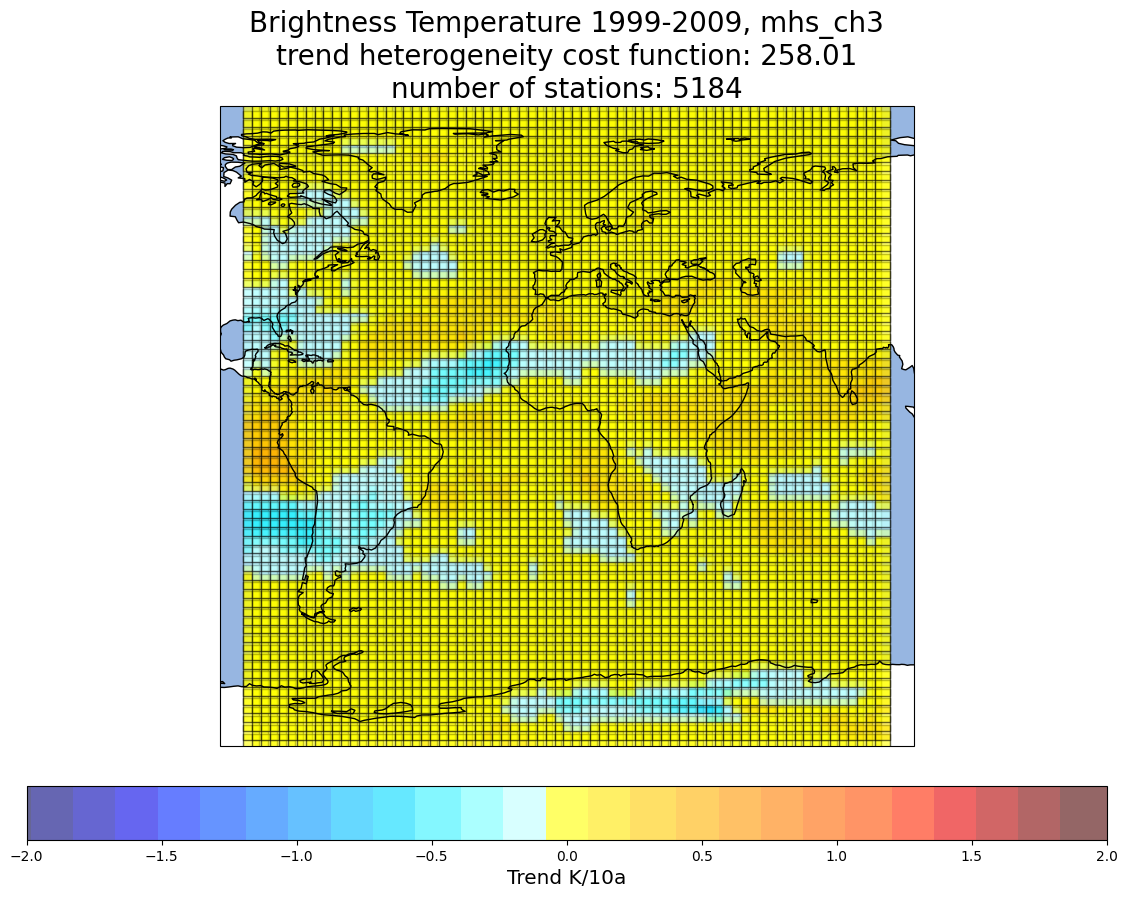

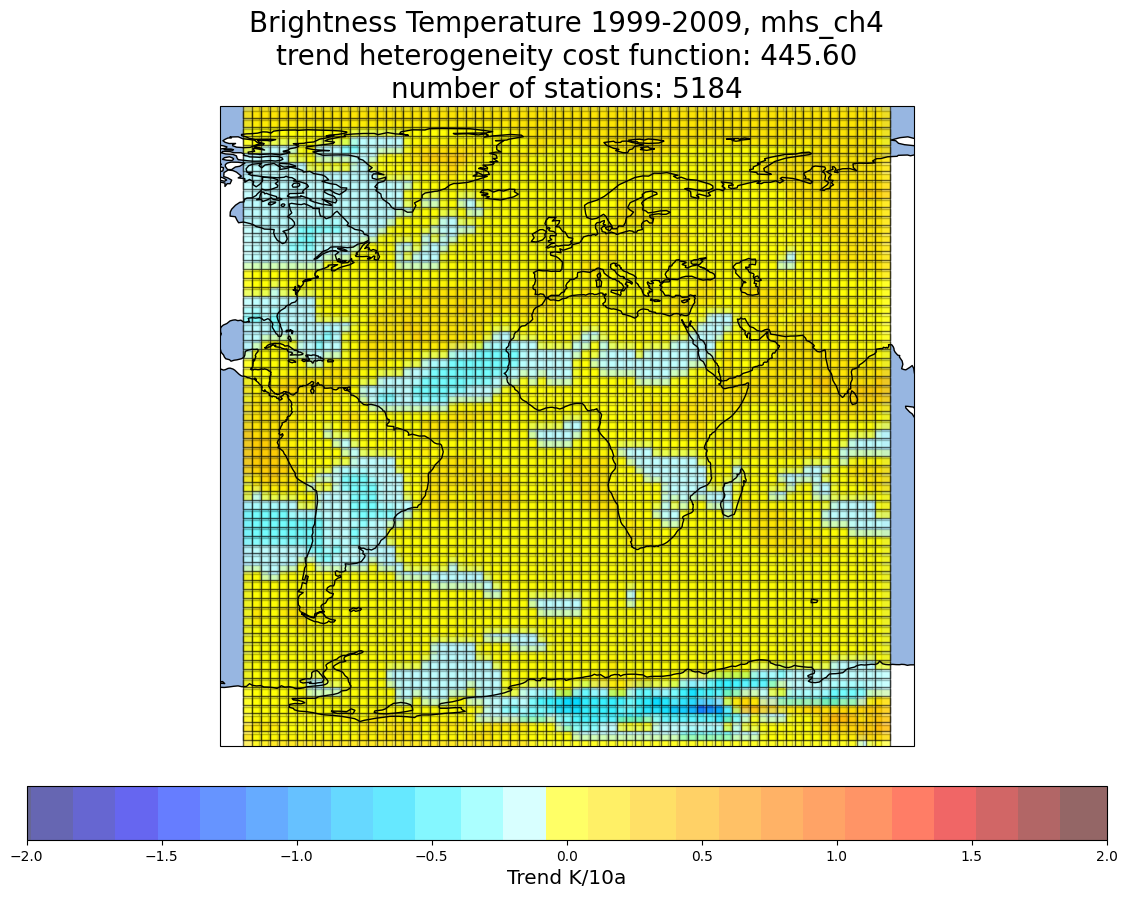

In [6]:
for k in ['ch2', 'ch3', 'ch4']:
    files = glob.glob('/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_trends/*'+k+'.p')
    files = np.sort(files)
    for i in files:
        plot_world_map(i, i.split('/')[-1].split('.')[0], marker_size = 125, marker_shape = 's', alpha = 0.6 )


## AMSU-b

In [4]:
# ### Convert amsub. data to gridded mean without interpolation

# @ray.remote
# def calc(df_mon, lat_range, lon_range, targetlat, targetlon):
#     target_df = df_mon[np.logical_and(np.logical_and(df_mon.latitude >= lat_range[0], df_mon.latitude < lat_range[1]),np.logical_and(df_mon.longitude >= lon_range[0], df_mon.longitude < lon_range[1]))]
#     r00 = np.nanmean(target_df['Ch18_BT'])
#     r01 = np.nanmean(target_df['Ch19_BT'])
#     r02 = np.nanmean(target_df['Ch20_BT'])
#     r03 = len(target_df['Ch18_BT'])
#     r04 = str(df_mon.iloc[0].Time.year) + '-' + str(df_mon.iloc[0].Time.month)
#     return r00, r01, r02, r03, r04, targetlat, targetlon


# for yr in range(1999,2012):
#     lats = np.array(range(-8875,+9125, 250))/100.
#     print(len(lats), lats)
#     lons = np.array(range(125, 36000, 250))/100.
#     print(len(lons), lons)

#     time_series = {}
#     for targetlon in lats:
#         for targetlat in lons:
#             time_series[str(targetlat) + '_' + str(targetlon)] = [[],[],[],[],[]]

#     for imon in range(1,13):
#         print("Month: ", imon)
#         fidu_files = glob.glob('/users/staff/uvoggenberger/scratch/fiduceo/dap.ceda.ac.uk/neodc/fiduceo/data/fcdr/microwave/v4.1/amsub/noaa15/'+str(yr)+'/'+str(imon).zfill(2)+'/*/*.0.1.nc')

#         to_concat = []
#         for fifi in fidu_files[:]:
#             # print(fifi)
#             with h5py.File(fifi) as fi:
#                 # print(fi.keys())
#                 vars = ['Ch18_BT', 'Ch19_BT', 'Ch20_BT', 'latitude', 'longitude', 'Time']
#                 to_df = {}
#                 for var in vars:
#                     if var == 'Time':
#                         to_df[var] = np.array([fi[var][:]]*90).flatten()
#                     else:
#                         to_df[var] = np.array(fi[var][:]).flatten()/100.
#                     # print(var, len(to_df[var]))
#             df = pd.DataFrame.from_dict(to_df)
#     #         break
#     #     break
#     # break
#             for chan in ['Ch18_BT', 'Ch19_BT', 'Ch20_BT']:
#                 df[chan].replace(655.35, np.nan, inplace=True)
#             df.dropna(inplace=True)
#             df.Time = pd.to_datetime(df.Time, unit='s')
#             to_concat.append(df)

#         df_mon = pd.concat(to_concat)
#         ray_df_mon = ray.put(df_mon)
#         result_ids = []
#         for targetlon in lats[:5]:
#             for targetlat in lons[:5]:
#                 lat_range = [targetlat - 1.25, targetlat + 1.25]
#                 lon_range = [targetlon - 1.25, targetlon + 1.25]
#                 result_ids.append(calc.remote(ray_df_mon, lat_range, lon_range, targetlat, targetlon))
#         results = ray.get(result_ids)
#         print()
#         for ri in results:
#             targetlat = ri[-2]
#             targetlon = ri[-1]
#             time_series[str(targetlat) + '_' + str(targetlon)][0].append(ri[0])
#             time_series[str(targetlat) + '_' + str(targetlon)][1].append(ri[1])
#             time_series[str(targetlat) + '_' + str(targetlon)][2].append(ri[2])
#             time_series[str(targetlat) + '_' + str(targetlon)][3].append(ri[3])
#             time_series[str(targetlat) + '_' + str(targetlon)][4].append(ri[4])
    
#     pickle.dump( time_series, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/amsub_data_"+str(yr)+".p", "wb" ) )

# ray.shutdown()

In [5]:
# time_series = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_data_1999.p", "rb" ) )

# for yr in range(2000,2010):
#     time_series_add = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_data_"+str(yr)+".p", "rb" ) )

#     for k in time_series.keys():
#         for i in range(5):
#             time_series[k][i].extend(time_series_add[k][i])

# lats = np.array(range(-8875,+9125, 250))/100.
# lons = np.array(range(125, 36000, 250))/100.

# trends_ch3 = {}
# trends_ch4 = {}
# trends_ch5 = {}
# for lat_lon in time_series.keys():
#     if np.count_nonzero(np.invert(np.isnan(time_series[lat_lon][0]))) < 48: # select the number of minimum available months
#         continue
#     df = pandas.DataFrame(np.transpose(
#         [np.array(time_series[lat_lon][0]).flatten(), 
#          np.array(time_series[lat_lon][1]).flatten(), 
#          np.array(time_series[lat_lon][2]).flatten(), 
#          np.array(time_series[lat_lon][4]).flatten(), 
#          [float(lat_lon.split('_')[0])]*len(time_series[lat_lon][0]), 
#          [float(lat_lon.split('_')[1])]*len(time_series[lat_lon][0])]
#          ), columns=['ch3', 'ch4', 'ch5', 'time', 'lat', 'lon'])
#     df.time = pd.to_datetime(df.time) # [pd.to_datetime('2007-01-01') + pd.Timedelta(x, 'd') for x in df.time]
#     # df.replace(-99.99, np.nan, inplace=True)
#     # filter_array = np.abs(df.ch3 - df.ch4) < 0.5
#     # df.ch3[filter_array] = np.nan
#     # df.ch4[filter_array] = np.nan
#     # df.ch5[filter_array] = np.nan
#     for i in df:
#         if i != 'time':
#             df[i] =  df[i].astype(float)
#     df = df.dropna()
#     if len(df) < 10:
#         print('skipped: ', lat_lon)
#         continue


#     xdf = df.set_index(['lat', 'lon', 'time']).to_xarray()
#     trends_ch3[lat_lon] = (rasotools.met.time.trend(xdf.ch3, only_slopes=True, method='polyfit')* 3650) # len(df.time)*12.*10.)
#     trends_ch4[lat_lon] = (rasotools.met.time.trend(xdf.ch4, only_slopes=True, method='polyfit')* 3650) # len(df.time)*12.*10.)
#     trends_ch5[lat_lon] = (rasotools.met.time.trend(xdf.ch5, only_slopes=True, method='polyfit')* 3650) # len(df.time)*12.*10.)

# pickle.dump( trends_ch3, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_trends/amsub_ch3.p", "wb" ) )
# pickle.dump( trends_ch4, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_trends/amsub_ch4.p", "wb" ) )
# pickle.dump( trends_ch5, open( "/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_trends/amsub_ch5.p", "wb" ) )

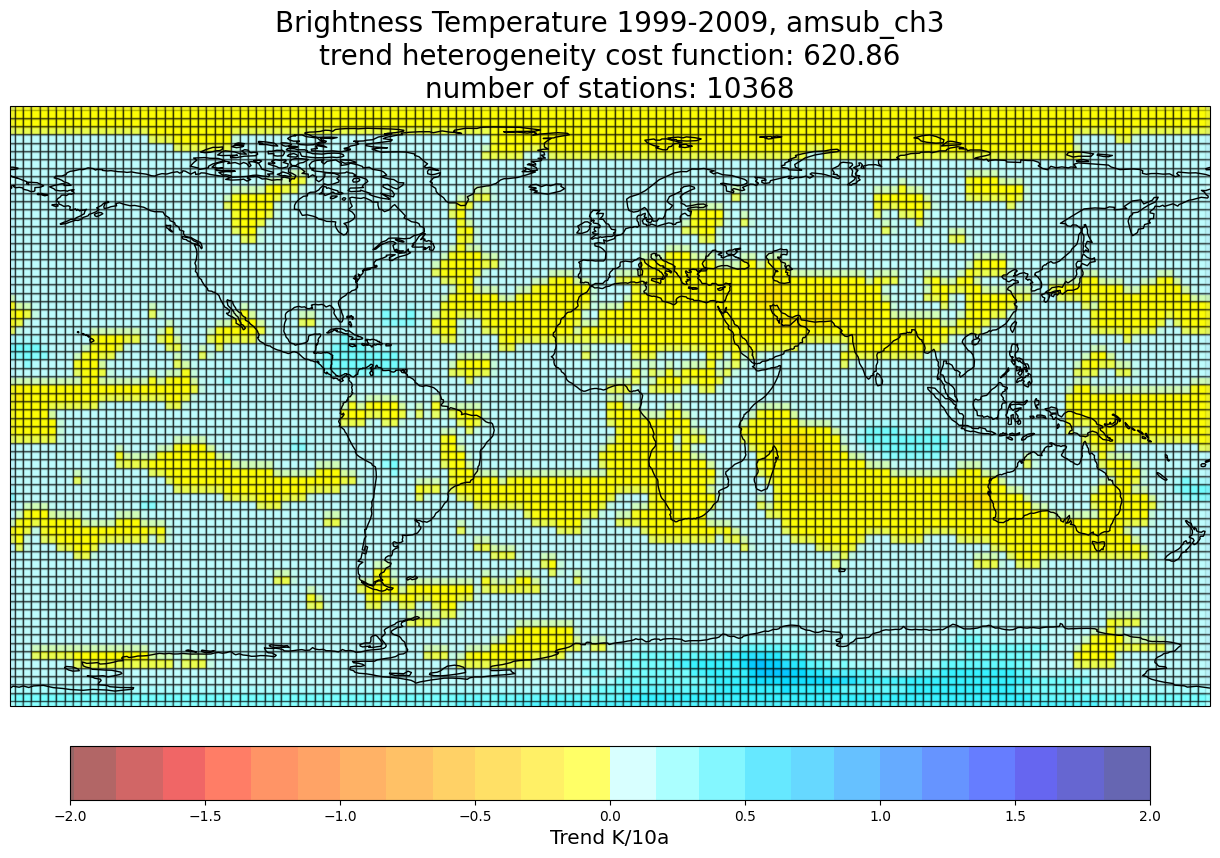

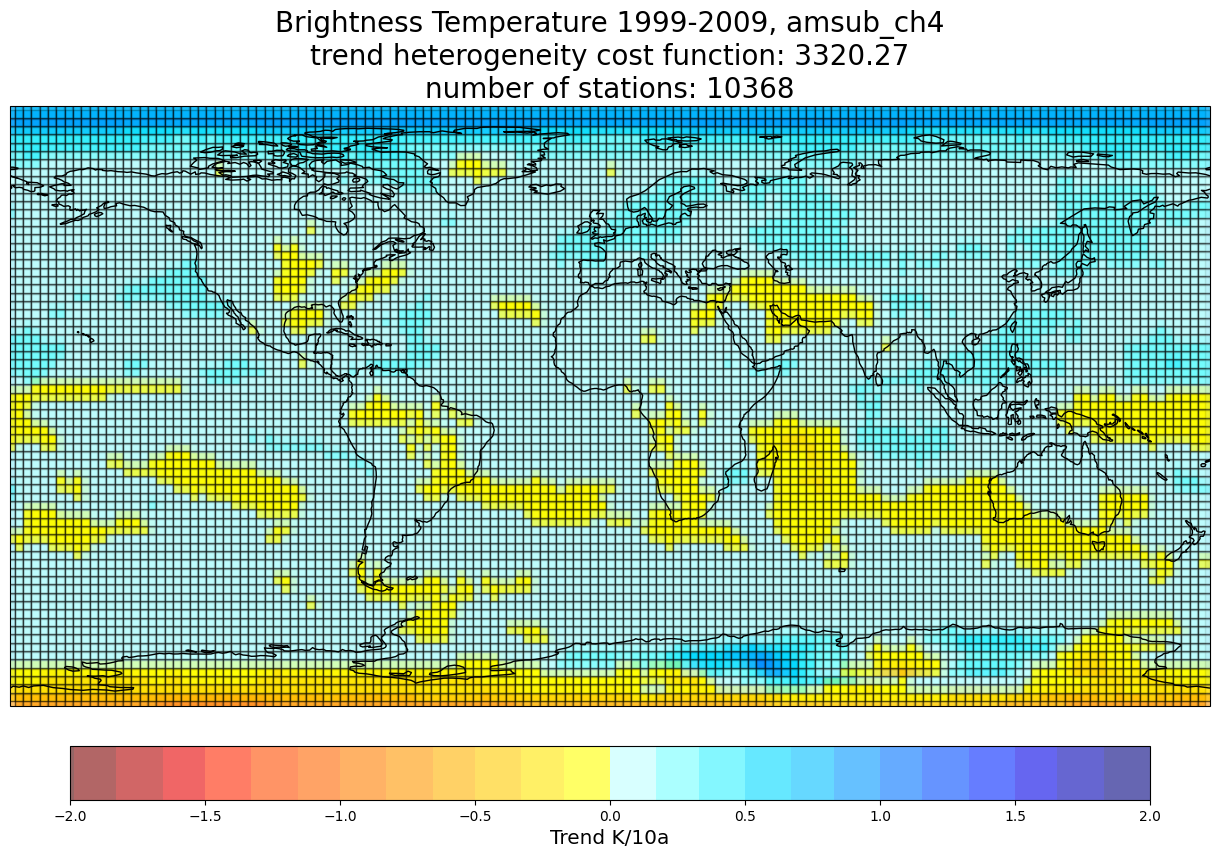

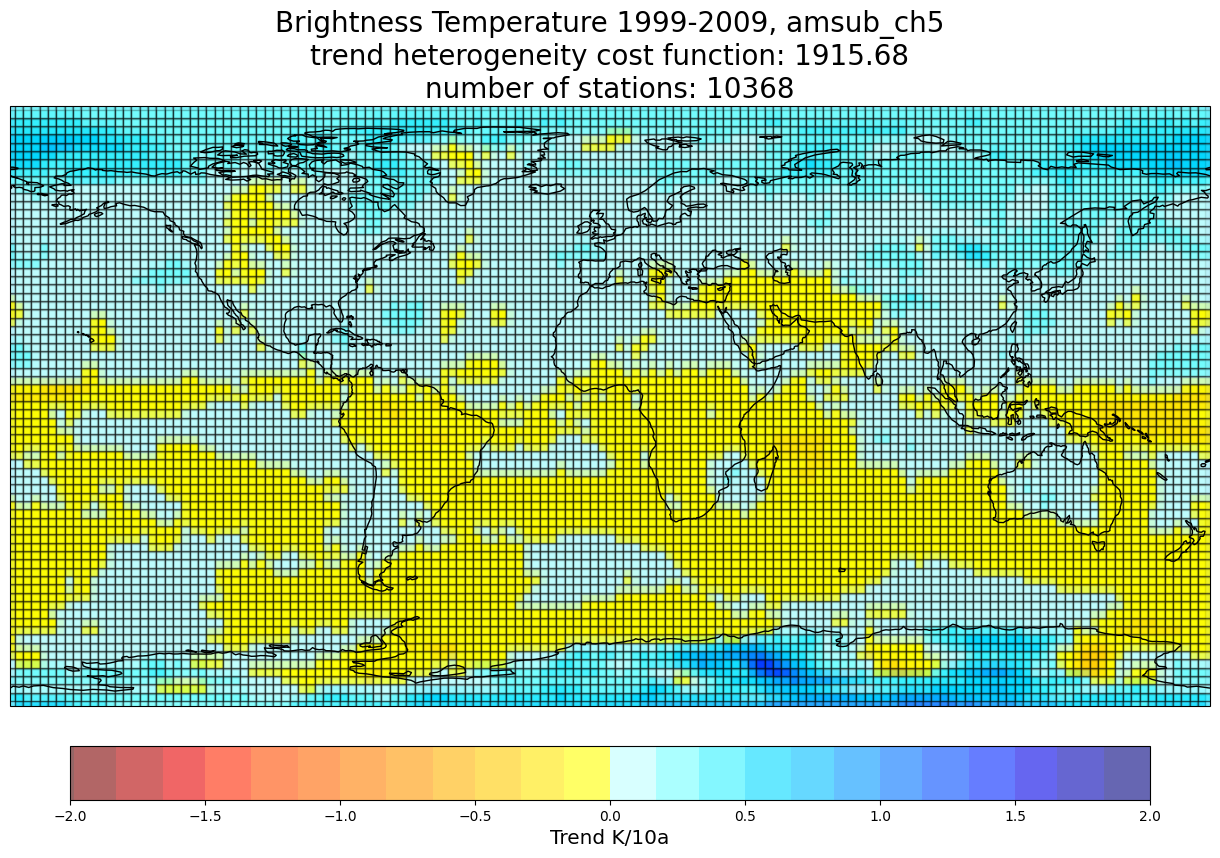

In [4]:
for k in ['ch3', 'ch4', 'ch5']:
    files = glob.glob('/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_trends/*'+k+'.p')
    files = np.sort(files)
    for i in files:
        plot_world_map(i, i.split('/')[-1].split('.')[0], marker_size = 125, marker_shape = 's', alpha = 0.6, cold_positive=True)


## Compare Pixels

In [5]:
amsub = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_data_1999.p", "rb" ) )
for yr in range(2000,2011):
    time_series_add = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/new2_amsub_data_"+str(yr)+".p", "rb" ) )
    for k in amsub.keys():
        for i in range(5):
            amsub[k][i].extend(time_series_add[k][i])

mhs = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_data_2010.p", "rb" ) )
for yr in range(2011,2017):
    time_series_add = pickle.load( open( "/users/staff/uvoggenberger/scratch/RTTOV_output/mhs_data_"+str(yr)+".p", "rb" ) )
    for k in mhs.keys():
        for i in range(5):
            mhs[k][i].extend(time_series_add[k][i])
    

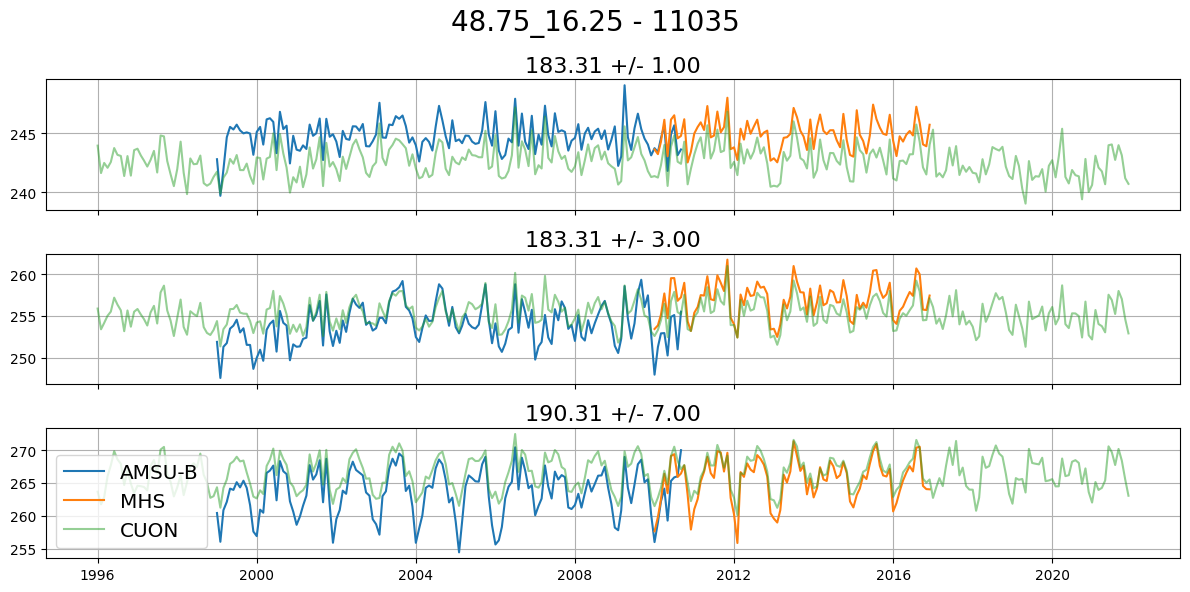

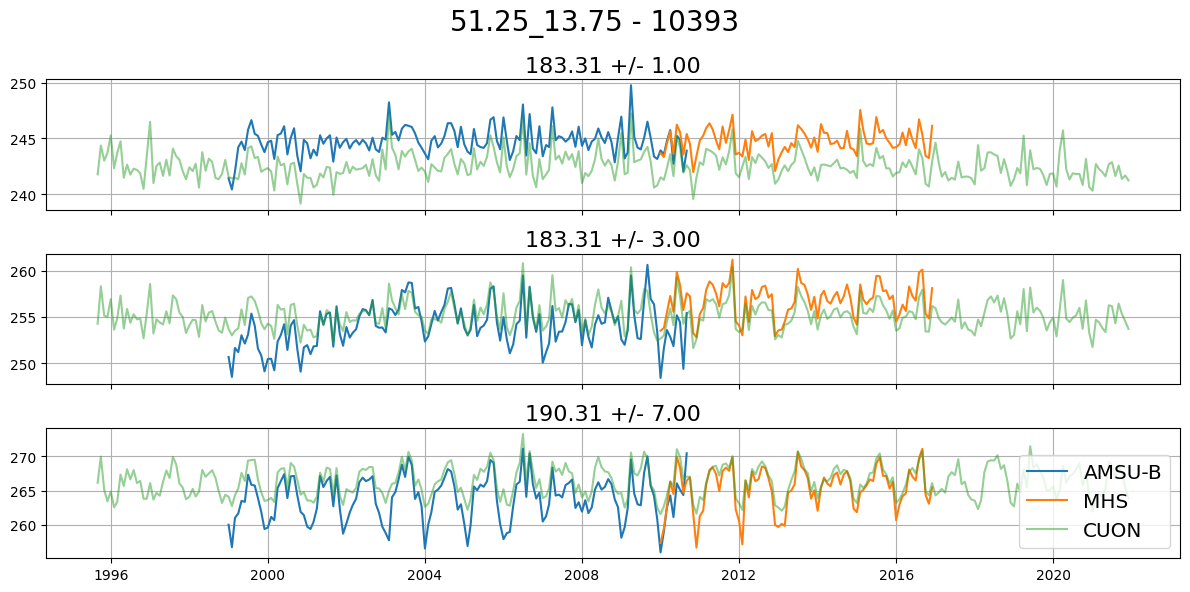

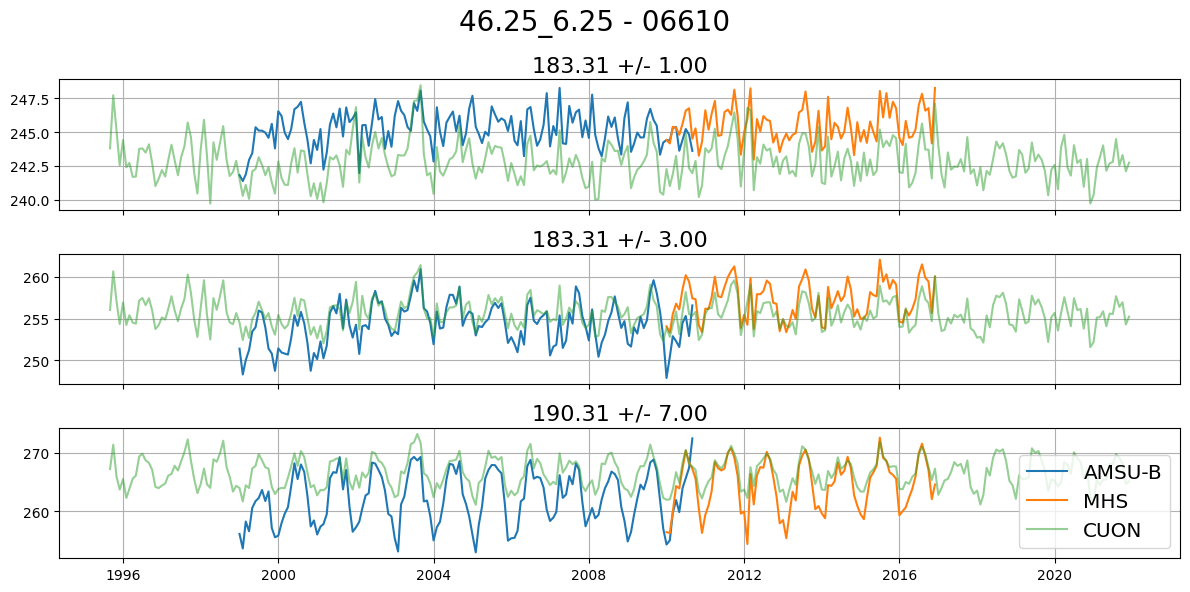

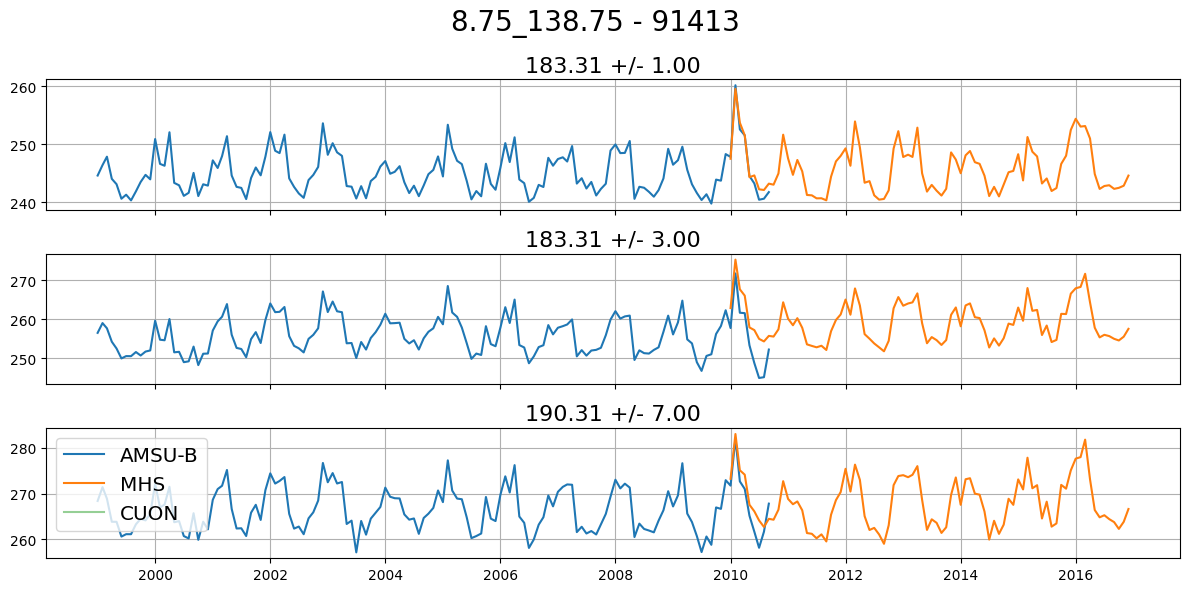

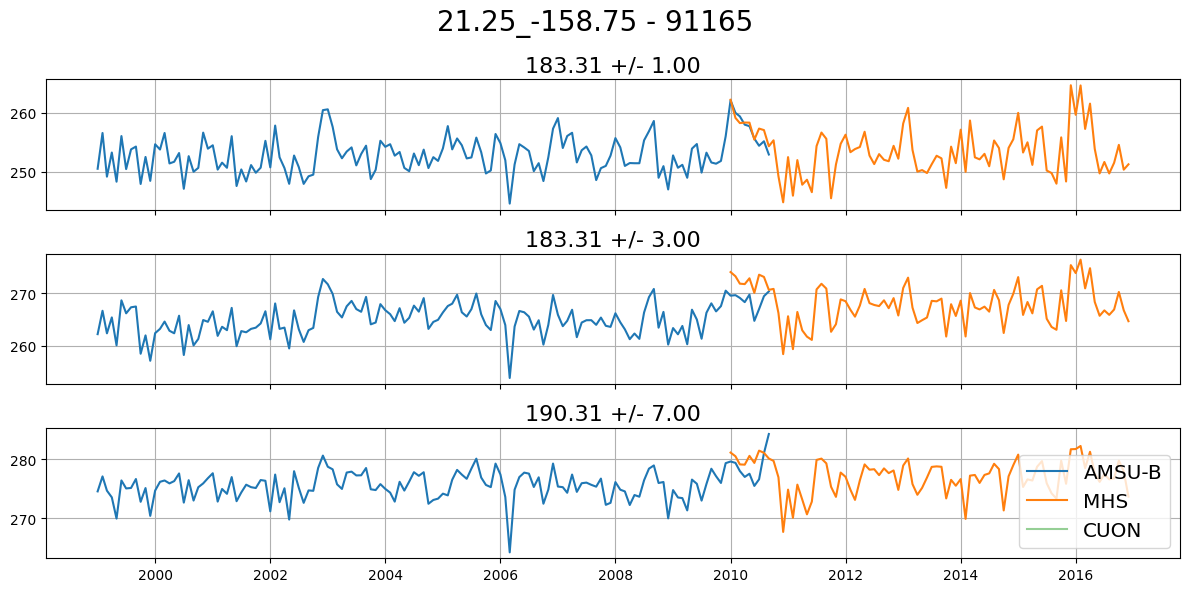

In [10]:
lats = np.array(range(-8875,+9125, 250))/100.
lons = np.array(range(-17875, 18125, 250))/100.

time_series = {}

for sta in ['11035', '10393', '06610', '91413', '91165',]:
    station = glob.glob('/mnt/jetfs/scratch/uvoggenberger/rttov_out/humidity/bt2_0*'+sta+'*.nc')[0]
    time_series = {}
    df = xr.open_dataset(station, decode_times=False).to_dataframe()
    ts_index =  str(df.lat.iloc[0]) + '_' + str(df.lon.iloc[0])
    time_series[ts_index] = [[],[],[],[],[]]
    sel_df = df.loc(axis=0)[:, :, [0], :, [0]]
    time_series[ts_index][0].append(df[np.logical_and(df.press == 3 , df.index.get_level_values('hour') == 0)].montemp.values)
    time_series[ts_index][1].append(df[np.logical_and(df.press == 4 , df.index.get_level_values('hour') == 0)].montemp.values)
    time_series[ts_index][2].append(df[np.logical_and(df.press == 5 , df.index.get_level_values('hour') == 0)].montemp.values)
    time_series[ts_index][3].append(df[np.logical_and(df.press == 3 , df.index.get_level_values('hour') == 0)].datum.values)
    time_series[ts_index][4].append(df[np.logical_and(df.press == 3 , df.index.get_level_values('hour') == 0)].goodmon.values)
    for lat_lon in time_series.keys():
        df1 = pandas.DataFrame(np.transpose(
            [   np.array(time_series[lat_lon][0]).flatten(), 
            np.array(time_series[lat_lon][1]).flatten(), 
            np.array(time_series[lat_lon][2]).flatten(), 
            np.array(time_series[lat_lon][3]).flatten(), 
            np.array(time_series[lat_lon][4]).flatten(), 
            [float(lat_lon.split('_')[0])]*len(np.array(time_series[lat_lon][0]).flatten()), 
            [float(lat_lon.split('_')[1])]*len(np.array(time_series[lat_lon][0]).flatten())
            ]
            ), columns=['ch3', 'ch4', 'ch5', 'time', 'goodmon', 'lat', 'lon'])
        df1.time = [pd.to_datetime('1900-01-01') + pd.Timedelta(x, 'd') for x in df1.time]

    station = glob.glob('/mnt/jetfs/scratch/uvoggenberger/rttov_out/humidity_adj/bt2_0*'+sta+'*.nc')[0]
    time_series = {}
    df = xr.open_dataset(station, decode_times=False).to_dataframe()
    ts_index =  str(df.lat.iloc[0]) + '_' + str(df.lon.iloc[0])
    time_series[ts_index] = [[],[],[],[],[]]
    sel_df = df.loc(axis=0)[:, :, [0], :, [0]]
    time_series[ts_index][0].append(df[np.logical_and(df.press == 3 , df.index.get_level_values('hour') == 0)].montemp.values)
    time_series[ts_index][1].append(df[np.logical_and(df.press == 4 , df.index.get_level_values('hour') == 0)].montemp.values)
    time_series[ts_index][2].append(df[np.logical_and(df.press == 5 , df.index.get_level_values('hour') == 0)].montemp.values)
    time_series[ts_index][3].append(df[np.logical_and(df.press == 3 , df.index.get_level_values('hour') == 0)].datum.values)
    time_series[ts_index][4].append(df[np.logical_and(df.press == 3 , df.index.get_level_values('hour') == 0)].goodmon.values)
    for lat_lon in time_series.keys():
        df2 = pandas.DataFrame(np.transpose(
            [   np.array(time_series[lat_lon][0]).flatten(), 
            np.array(time_series[lat_lon][1]).flatten(), 
            np.array(time_series[lat_lon][2]).flatten(), 
            np.array(time_series[lat_lon][3]).flatten(), 
            np.array(time_series[lat_lon][4]).flatten(), 
            [float(lat_lon.split('_')[0])]*len(np.array(time_series[lat_lon][0]).flatten()), 
            [float(lat_lon.split('_')[1])]*len(np.array(time_series[lat_lon][0]).flatten())
            ]
            ), columns=['ch3', 'ch4', 'ch5', 'time', 'goodmon', 'lat', 'lon'])
        df2.time = [pd.to_datetime('1900-01-01') + pd.Timedelta(x, 'd') for x in df2.time]

    titles = ['183.31 +/- 1.00', '183.31 +/- 3.00', '190.31 +/- 7.00']  
    pixel = str(find_nearest(lats, df2.lat.iloc[0])) + '_' + str(find_nearest(lons, df2.lon.iloc[0]))
    fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=True)  
    for chan in [0,1,2]:
        plt.subplot(3, 1, chan +1)
        plt.plot(pd.to_datetime(amsub[pixel][-1]), amsub[pixel][chan], label='AMSU-B')
        plt.plot(pd.to_datetime(mhs[pixel][-1]), mhs[pixel][chan], label='MHS')
        plt.plot(np.array(df1['time'])[1700:], np.array(df1['ch'+str(3+chan)])[1700:], label='CUON', alpha = 0.5)
        # plt.plot(np.array(df2['time'])[1700:], np.array(df2['ch'+str(3+chan)])[1700:], label='CUON ADJ', alpha = 0.3, linewidth = 3)
        plt.title(titles[chan], fontsize=16)
        plt.grid()
    fig.suptitle(pixel + ' - ' + sta, fontsize=20)    
    plt.legend()
    plt.tight_layout()  # Adjust subplot parameters to give specified padding.
    plt.show()
    plt.close()
